In [83]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import workbench as wp

In [49]:
# Reload workbench module so changes are included
_ = importlib.reload(wp)

In [50]:
filename = "1999-2000/BMX.XPT"
bmx_2000 = pd.read_sas(filename)

In [51]:
bmx_2000.shape

(9282, 38)

In [52]:
bmx_2000.columns

Index(['SEQN', 'BMAEXLEN', 'BMAEXSTS', 'BMAEXCMT', 'BMXWT', 'BMIWT',
       'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT',
       'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXCALF', 'BMICALF', 'BMXARML',
       'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXTHICR',
       'BMITHICR', 'BMXTRI', 'BMITRI', 'BMXSUB', 'BMISUB', 'BMAAMP',
       'BMAUREXT', 'BMAUPREL', 'BMAULEXT', 'BMAUPLEL', 'BMALOREX', 'BMALORKN',
       'BMALLEXT', 'BMALLKNE'],
      dtype='object')

In [53]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
bmx_2000["SEQN"].is_unique

True

In [54]:
filename = "1999-2000/DEMO.XPT"
demo_2000 = pd.read_sas(filename)
demo_2000.shape

(9965, 144)

In [55]:
demo_2000["SEQN"].is_unique

True

In [56]:
# Add bmx info to demo info
combined_2000 = demo_2000.merge(bmx_2000, how="left", on="SEQN")
combined_2000.shape

(9965, 181)

In [57]:
# Verify new column count meets expectations
# Should be number of cols in each dataframe minus 1 for shared col (SEQN)
demo_2000.shape[1] + bmx_2000.shape[1] - 1

181

In [58]:
# Will review male and female participants separately
# Review gender entries
df = combined_2000
col = "RIAGENDR"

df[col].value_counts(dropna=False)

2.0    5082
1.0    4883
Name: RIAGENDR, dtype: int64

In [59]:
# Create mapping of gender code to more readable value
# Per codebook 1.0 = male and 2.0 = female
gender_map = {1.0: "Male",
             2.0: "Female",
             np.nan: "Missing"}

In [60]:
# Add column with gender code translation
new_col = col + "_x"
df[new_col] = df[col].map(gender_map)

df[new_col].value_counts(dropna=False)

Female    5082
Male      4883
Name: RIAGENDR_x, dtype: int64

In [61]:
# Review distributions of male and female BMI's 
# as identified by variable BMXBMI
id_col = "SEQN"
cat_col = "RIAGENDR" + "_x"
data_col = "BMXBMI"

male_filter = (df[cat_col] == "Male")
female_filter = (df[cat_col] == "Female")

bmi_male = df[male_filter].loc[:, [id_col, data_col]]
# drop na's
_ = bmi_male.dropna(axis=0, how="any", inplace=True)
bmi_female = df[female_filter].loc[:, [id_col, data_col]]
_ = bmi_female.dropna(axis=0, how="any", inplace=True)

print(bmi_male.shape, bmi_female.shape)

(4125, 2) (4337, 2)


In [62]:
# Sanity check of one of the new df's
bmi_male.head()

,SEQN,BMXBMI
1,2.0,24.90
4,5.0,29.10
7,8.0,15.51
9,10.0,30.94
10,11.0,22.00


In [78]:
# Compute summary stats and create viz of bmi measurements

In [73]:
df = bmi_male

In [74]:
df[data_col].describe()

count    4125.000000
mean       24.309008
std         6.476153
min        12.150000
25%        19.360000
50%        23.940000
75%        28.280000
max        60.870000
Name: BMXBMI, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Survey Year 1999-2000\nBMI - Male')

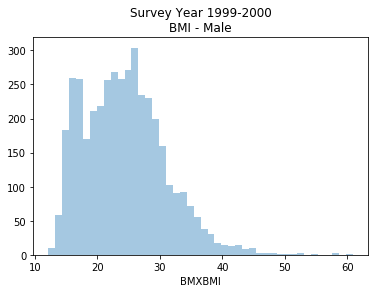

In [75]:
# Create histogram of bmi's
sns.distplot(df[data_col], kde=False).set_title("Survey Year 1999-2000\nBMI - Male")

In [76]:
df = bmi_female

In [77]:
df[data_col].describe()

count    4337.000000
mean       25.450892
std         7.535545
min        11.490000
25%        19.960000
50%        24.370000
75%        29.880000
max        66.440000
Name: BMXBMI, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Survey Year 1999-2000\nBMI - Female')

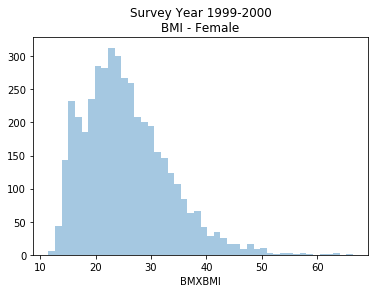

In [66]:
# Create histogram of bmi's
sns.distplot(df[data_col], kde=False).set_title("Survey Year 1999-2000\nBMI - Female")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


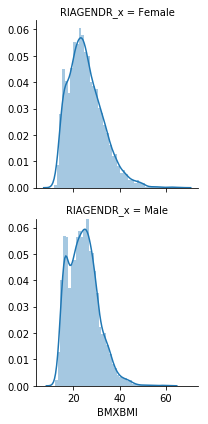

In [79]:
df = combined_2000
cat_col = "RIAGENDR" + "_x"
data_col = "BMXBMI"



g = sns.FacetGrid(df, row=cat_col)
g = g.map(sns.distplot, data_col)

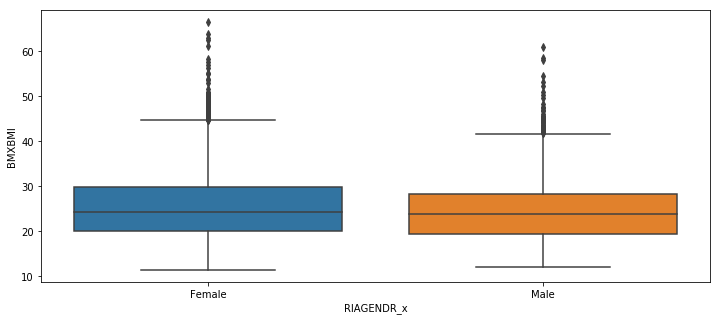

In [84]:
plt.figure(figsize=(12, 5))

sns.boxplot(x=cat_col, y=data_col, data=df)